# (b) Exploring the data:
## i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [1]:
#read and pre-process data
import xlrd
import pandas as pd


#merge all sheets and store data in dataset
dataset= pd.read_excel('Folds5x2_pp.xlsx', header=0, index=False)
print ("show all data in a DataFrame:\n",dataset,"\n")
col_num,row_num = dataset.shape[1],dataset.shape[0]
print ("this dataset has %d rows and %d colums.\n"%(row_num,col_num))
print ("In this dataset, one row represent a sample, one column represent a feature of power plant")

show all data in a DataFrame:
          AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns] 

this dataset has 9568 rows and 5 colums.

In this dataset, one row represent a sample, one column represent a feature of power plant


## ii. Make pairwise scatterplots of all the varianbles in the data set including thepredictors (independent variables) with the dependent variable. Describe your findings.

My finding is :
AT and V are negatively correlated with PE
AP and RH are poorly related with PE.
Besides, there is a linear correlation between AT and V.


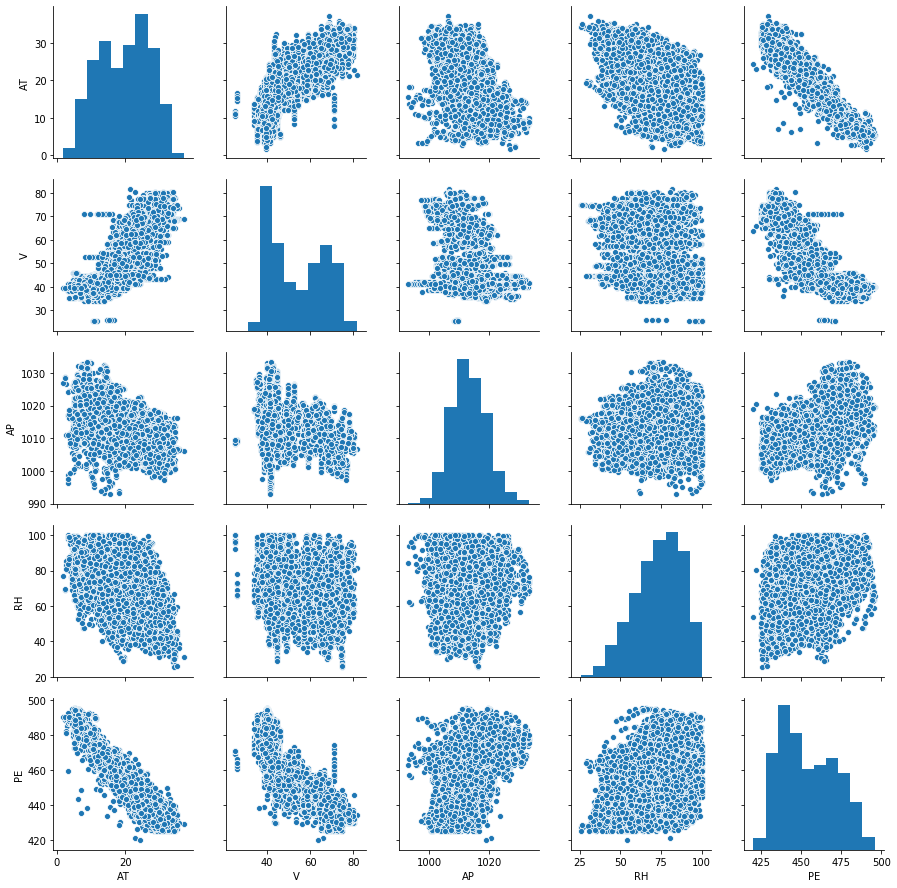

In [26]:
#Make pairwise scatterplots of all the varianbles in the data set
import seaborn as sns
sns.pairplot(dataset)
print("My finding is :\nAT and V are negatively correlated with PE\n\
AP and RH are poorly related with PE.\n\
Besides, there is a linear correlation between AT and V.")

## iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [3]:
#Summarize the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset and show them in a table
import numpy as np
col_list=dataset.columns.values.tolist()
value=list()
for col in col_list:
    col_data=np.array(dataset[col].tolist())
    #using numpy to calculate mean,median,quartiles
    mean=np.mean(col_data)
    col_range=np.max(col_data)-np.min(col_data)
    quartiles=np.percentile(col_data, [25, 50, 75])
    interquartiles=quartiles[2]-quartiles[0]
    one_value=[mean,quartiles[0],quartiles[1],quartiles[2],col_range,interquartiles]
    value.append(one_value)
value_array=np.array(value).T

value_df=pd.DataFrame(value_array,index=['mean','first quartile','median','third quartile','range','interquartiles'],columns=col_list)
print('Summarize the mean,median,range,first and third quartiles，interquartiles in a table: \n')
value_df

Summarize the mean,median,range,first and third quartiles，interquartiles in a table: 



,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartiles,12.210000,24.800000,8.160000,21.502500,28.680000


# (c) For each predictor, fit a simple linear regression model to predict the response.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:04   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

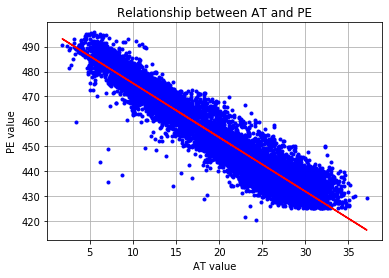

Outliers are: 
          AT      V       AP     RH      PE
1438  15.61  38.52  1018.40  80.99  439.21
3117   8.74  36.30  1015.18  61.97  438.63
3383   6.22  39.85  1012.05  86.88  443.73
3895  14.69  49.64  1023.43  78.17  434.12
4218  23.00  66.05  1020.61  80.29  421.57
7375  18.60  58.71  1009.80  86.42  430.38
7398   7.06  41.74  1021.95  90.38  448.97
7664   7.14  41.22  1016.60  97.09  435.58
8187  18.26  61.27  1019.10  74.74  428.67
8362   3.40  39.64  1011.10  83.43  459.86
8717  24.27  63.87  1018.88  53.96  420.26


In [4]:
#fit a simple linear regression model to predict the response
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

#pre-process data
train_X_array_AT=np.array(dataset["AT"].tolist()).reshape(-1,1)
train_X_array_V=np.array(dataset["V"].tolist()).reshape(-1,1)
train_X_array_AP=np.array(dataset["AP"].tolist()).reshape(-1,1)
train_X_array_RH=np.array(dataset["RH"].tolist()).reshape(-1,1)
train_Y_array_PE=np.array(dataset["PE"].tolist()).reshape(-1,1)

#liner relationship between AT and PE
coefficient=list()
model=LinearRegression()
model.fit(train_X_array_AT,train_Y_array_PE)
coefficient.extend(list(model.coef_[0]))
predict_Y_array_PE=model.predict(train_X_array_AT)

#estimate model
mod = sm.OLS(train_Y_array_PE, sm.add_constant(train_X_array_AT))
results = mod.fit()
print(results.summary(),"\n")
print("the R^2 of this model is 0.899 and p-value is small,\
there a significant association between AT and PE")

#show in plot
plt.figure()
plt.title('Relationship between AT and PE')
plt.xlabel('AT value')
plt.ylabel('PE value')
plt.grid(True)
plt.plot(train_X_array_AT, train_Y_array_PE, 'b.')
plt.plot(train_X_array_AT, predict_Y_array_PE, 'r-')
plt.show()

#find outliers
outliers=results.outlier_test()
outliers = pd.DataFrame(outliers)
outliers_position = outliers[2]<0.1
outlier_points = dataset[outliers_position]
if not outlier_points.empty:
    print("Outliers are: \n", outlier_points)
else:
    print("No outliers! ")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:15   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

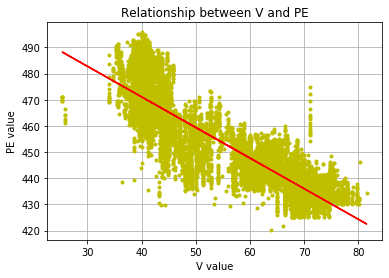

Outliers are: 
         AT      V       AP     RH      PE
1709  8.13  71.14  1018.94  86.70  471.99
3103  7.89  71.14  1018.40  86.49  474.66


In [5]:
## liner relationship between V and PE
model=LinearRegression()
model.fit(train_X_array_V,train_Y_array_PE)
coefficient.extend(list(model.coef_[0]))
predict_Y_array_PE=model.predict(train_X_array_V)

#estimate model
mod = sm.OLS(train_Y_array_PE, sm.add_constant(train_X_array_V))
results = mod.fit()
print(results.summary(),"\n")
print("the R^2 of this model is 0.757 and p-value is small, \
there is a significant association between V and PE")

#show in plot
plt.figure()
plt.title('Relationship between V and PE')
plt.xlabel('V value')
plt.ylabel('PE value')
plt.grid(True)
plt.plot(train_X_array_V, train_Y_array_PE, 'y.')
plt.plot(train_X_array_V, predict_Y_array_PE, 'r-')
plt.show()

#find outliers
outliers=results.outlier_test()
outliers = pd.DataFrame(outliers)
outliers_position = outliers[2]<0.1
outlier_points = dataset[outliers_position]
if not outlier_points.empty:
    print("Outliers are: \n", outlier_points)
else:
    print("No outliers! ")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:27   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

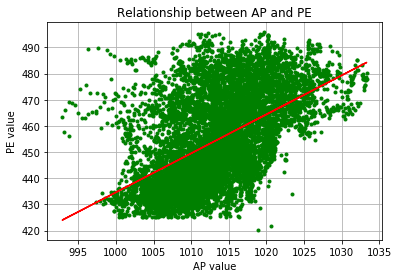

No outliers! 


In [6]:
#liner relationship between AP and PE
model=LinearRegression()
model.fit(train_X_array_AP,train_Y_array_PE)
coefficient.extend(list(model.coef_[0]))
predict_Y_array_PE=model.predict(train_X_array_AP)

#estimate model
mod = sm.OLS(train_Y_array_PE, sm.add_constant(train_X_array_AP))
results = mod.fit()
print(results.summary(),"\n")
print("the R^2 of this model is 0.269, \
there isn't a significant linear association between AP and PE")

#show in plot
plt.figure()
plt.title('Relationship between AP and PE')
plt.xlabel('AP value')
plt.ylabel('PE value')
plt.grid(True)
plt.plot(train_X_array_AP, train_Y_array_PE, 'g.')
plt.plot(train_X_array_AP, predict_Y_array_PE, 'r-')
plt.show()

#find outliers
outliers=results.outlier_test()
outliers = pd.DataFrame(outliers)
outliers_position = outliers[2]<0.1
outlier_points = dataset[outliers_position]
if not outlier_points.empty:
    print("Outliers are: \n", outlier_points)
else:
    print("No outliers! ")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:39   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

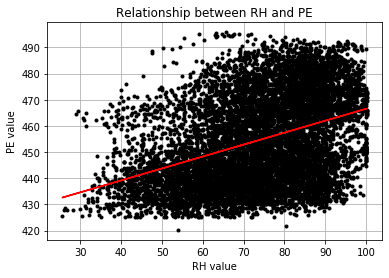

No outliers! 


In [7]:
#liner relationship between RH and PE
model=LinearRegression()
model.fit(train_X_array_RH,train_Y_array_PE)
coefficient.extend(list(model.coef_[0]))
predict_Y_array_PE=model.predict(train_X_array_RH)

#estimate model
mod = sm.OLS(train_Y_array_PE, sm.add_constant(train_X_array_RH))
results = mod.fit()
print(results.summary(),"\n\n")
print("the R^2 of this model is 0.152, \
there isn't a significant linear association between RH and PE")

#show in plot
plt.figure()
plt.title('Relationship between RH and PE')
plt.xlabel('RH value')
plt.ylabel('PE value')
plt.grid(True)
plt.plot(train_X_array_RH, train_Y_array_PE, 'k.')
plt.plot(train_X_array_RH, predict_Y_array_PE, 'r-')
plt.show()

#find outliers
outliers=results.outlier_test()
outliers = pd.DataFrame(outliers)
outliers_position = outliers[2]<0.1
outlier_points = dataset[outliers_position]
if not outlier_points.empty:
    print("Outliers are: \n", outlier_points)
else:
    print("No outliers! ")

# (d) Fit a multiple regression model to predict the response using all of the predictors.

In [8]:
#Fit a multiple regression model to predict the response using all of the predictors.
#pre-process data

train_X_array=np.array(dataset.loc[:,["AT","V","AP","RH"]])
train_Y_array=np.array(dataset.loc[:,["PE"]])

#train model
model.fit(train_X_array,train_Y_array)
new_coefficient=model.coef_[0]
print("Estimated coefficients: ",model.coef_,"\n")
predict_Y_array=model.predict(train_X_array)

#estimate
train_X_array = sm.add_constant(train_X_array)
mod = sm.OLS(train_Y_array, train_X_array)
results = mod.fit()
print(results.summary(),"\n")
print("The R-squared statistics for this model is 0.929, So the model is quite accuracy.\n\n")
print("Since for all independent variables’ p-value is 0, we can reject the null hypothesis for all independent variables")

Estimated coefficients:  [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]] 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:51   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.

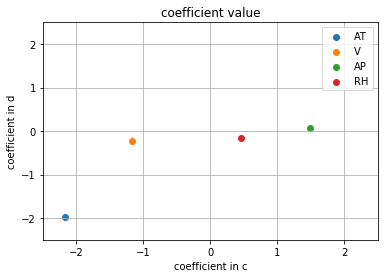

In [9]:
#Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.
plt.figure()
coef_label=["AT","V","AP","RH"]
plt.title("coefficient value")
plt.xlabel('coefficient in c')
plt.ylabel('coefficient in d')
plt.grid(True)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
for i in range(len(coef_label)):
    plt.scatter(coefficient[i], new_coefficient[i], label=coef_label[i])
plt.legend()
plt.show()

# (f) Is there evidence of nonlinear association between any of the predictors and the response?

In [10]:
#Using Polynomial Featuren to predict the relationship
from sklearn.preprocessing import PolynomialFeatures
#using the dataset which produced in problem c

#AT and PE
poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly_AT = poly.fit_transform(train_X_array_AT)
model.fit(x_train_poly_AT,train_Y_array_PE)
poly_predict_Y_array_AT=model.predict(x_train_poly_AT)
coefficient_AT=model.coef_[0]
print("We can see that the p-value for AT^2 and AT^3 are all equal to 0. We can sure that nonlinear \
association exist between the predictor AT and response PE \n")
x_train_poly_AT = sm.add_constant(x_train_poly_AT)
mod = sm.OLS(train_Y_array_PE, x_train_poly_AT)
results = mod.fit()
print(results.summary(),"\n")



We can see that the p-value for AT^2 and AT^3 are all equal to 0. We can sure that nonlinear association exist between the predictor AT and response PE 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:51   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

In [11]:
#V and PE
x_train_poly_V = poly.fit_transform(train_X_array_V)
model.fit(x_train_poly_V,train_Y_array_PE)
poly_predict_Y_array_V=model.predict(x_train_poly_V)
coefficient_V=model.coef_[0]
print("We can see that the p-value for V^2 is 0.768 and V^3 is 0.014 <0.05. So in 5% significant level, we conclude \
that nonlinear association exist between the predictor V and response PE\n")
x_train_poly_V = sm.add_constant(x_train_poly_V)
mod = sm.OLS(train_Y_array_PE, x_train_poly_V)
results = mod.fit()
print(results.summary(),"\n")



We can see that the p-value for V^2 is 0.768 and V^3 is 0.014 <0.05. So in 5% significant level, we conclude that nonlinear association exist between the predictor V and response PE

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:51   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    st

In [12]:
#AP and PE
x_train_poly_AP = poly.fit_transform(train_X_array_AP)
model.fit(x_train_poly_AP,train_Y_array_PE)
poly_predict_Y_array_AP=model.predict(x_train_poly_AP)
coefficient_AP=model.coef_[0]
print("We can see that the p-value for AP^2 and AP^3 are all equal to 0. However, the R^2 of this model is 0.275,\
this model is not accuracy, therefore, we cannot sure that nonlinear association exist between the predictor AP and response PE\n")
x_train_poly_AP = sm.add_constant(x_train_poly_AP)
mod = sm.OLS(train_Y_array_PE, x_train_poly_AP)
results = mod.fit()
print(results.summary(),"\n")



We can see that the p-value for AP^2 and AP^3 are all equal to 0. However, the R^2 of this model is 0.275,this model is not accuracy, therefore, we cannot sure that nonlinear association exist between the predictor AP and response PE

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:51   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                 

In [13]:
#RH and PE
x_train_poly_RH = poly.fit_transform(train_X_array_RH)
model.fit(x_train_poly_RH,train_Y_array_PE)
poly_predict_Y_array_RH=model.predict(x_train_poly_RH)
coefficient_RH=model.coef_[0]
print("We can see that the p-value for RH^2 and RH^3 are all equal to 0. However, R^2 of this model is 0.154,\
it is too small to make a decision. Therefore, we cannot sure that nonlinear association exist between the predictor RH and response PE\n")
x_train_poly_RH = sm.add_constant(x_train_poly_RH)
mod = sm.OLS(train_Y_array_PE, x_train_poly_RH)
results = mod.fit()
print(results.summary(),"\n")

We can see that the p-value for RH^2 and RH^3 are all equal to 0. However, R^2 of this model is 0.154,it is too small to make a decision. Therefore, we cannot sure that nonlinear association exist between the predictor RH and response PE

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:51   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust             

# (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [14]:
import statsmodels.formula.api as smf
results = smf.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : AP + AT : RH + V : AP + V : RH + AP : RH', data=dataset).fit()
print(results.summary(),"\n\n")
print("R^2 of this model is 0.936, therefore, this model is convincing.")
print("Through analyze this result, we can find :\nAT:V,AT:RH and V:AP are significant at any level.\n\
AP:RH is significant at 5% significant level.\nV:RH is significant at 10% significant level.\nAT:AP is not significant ")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:31:51   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

# (h) Can you improve your model using possible interaction terms or nonlinear asso-ciations between the predictors and response? 
## Train the regression model on arandomly selected 70% subset of the data with all predictors.

In [83]:
#improve model by using possible interaction terms or nonlinear associations between the predictors and response
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse

#build test data and training data

train_data,test_data=train_test_split(dataset,test_size=0.3)

## basic model_1: include all independent variables 

In [84]:
#build the first model: just contain four indenpendent variables
model_1 = smf.ols(formula='PE ~ AT + V + AP + RH', data=train_data).fit()
print(model_1.summary())
line_model1_rsquared=model_1.rsquared

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.131e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:55:00   Log-Likelihood:                -19730.
No. Observations:                6697   AIC:                         3.947e+04
Df Residuals:                    6692   BIC:                         3.950e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    457.5411     11.767     38.882      0.0

## model_2: involving all possible interaction terms and quadratic nonlinearities

In [85]:
#build the second model: involving all possible interaction terms and quadratic nonlinearities
model_2 = smf.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : AP + AT : RH + V : AP + V : RH + AP : RH + \
                        + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2)', data=train_data).fit()
print(model_2.summary())
line_model2_rsquared=model_2.rsquared

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     6967.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:55:03   Log-Likelihood:                -19304.
No. Observations:                6697   AIC:                         3.864e+04
Df Residuals:                    6682   BIC:                         3.874e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6593.7315   1448.610     

## remove insignificant variables using p-values

In [86]:
#remove high p-value from model2
print("remove the highest p-value variables [V:RH] from model2 \
to make every variables become significant.\n")
new_model_2 = smf.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : AP + AT : RH +V:AP +AP : RH + \
                        + np.power(AT,2)+np.power(V,2)+ np.power(AP,2) + np.power(RH,2)', data=train_data).fit()
print(new_model_2.summary())

remove the highest p-value variables [V:RH] from model2 to make every variables become significant.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7504.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:55:09   Log-Likelihood:                -19304.
No. Observations:                6697   AIC:                         3.864e+04
Df Residuals:                    6683   BIC:                         3.873e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [87]:
#remove high p-value from model2
print("Continue tp remove the highest p-value variables [AT:AP] from model2 \
to make every variables become significant.\n")
new_model_2 = smf.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : RH + V:AP+ AP : RH + \
                        + np.power(AT,2)+ np.power(V,2) +np.power(AP,2) + np.power(RH,2)', data=train_data).fit()
print(new_model_2.summary())

Continue tp remove the highest p-value variables [AT:AP] from model2 to make every variables become significant.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     8131.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:56:14   Log-Likelihood:                -19304.
No. Observations:                6697   AIC:                         3.863e+04
Df Residuals:                    6684   BIC:                         3.872e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------

In [88]:
#remove high p-value from model2
print("Continue tp remove the highest p-value variables [V^2] from model2 \
to make every variables become significant.\n")
new_model_2 = smf.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : RH + V:AP+ AP : RH + \
                        + np.power(AT,2)+ np.power(AP,2) + np.power(RH,2)', data=train_data).fit()
print(new_model_2.summary())

Continue tp remove the highest p-value variables [V^2] from model2 to make every variables become significant.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     8868.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:56:27   Log-Likelihood:                -19305.
No. Observations:                6697   AIC:                         3.863e+04
Df Residuals:                    6685   BIC:                         3.872e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [90]:
#remove high p-value from model2
print("Finally, remove the highest p-value variables [V:AP] from model2 \
to make every variables become significant.\n")
new_model_2 = smf.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : RH + AP : RH + \
                        + np.power(AT,2) +np.power(AP,2) + np.power(RH,2)', data=train_data).fit()
print(new_model_2.summary(),"\n\n\n")
print("Now, every variable becomes significant, we remove ['AT:AP',V:AP','V:RH','np.power(V,2)'] form variables. \
Now, every predictor become significant at any level .However, this\
result is influenced by different train dataset. Therefore,this is not the only solution.")

Finally, remove the highest p-value variables [V:AP] from model2 to make every variables become significant.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9737.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:58:18   Log-Likelihood:                -19311.
No. Observations:                6697   AIC:                         3.864e+04
Df Residuals:                    6686   BIC:                         3.872e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

## Test both models on the remaining points and report your train and test MSEs.

In [91]:
#calculate MES of two models on both test data and training data

#MSE of model1
predict_model1_train=model_1.predict(train_data)
model1_train_mse = mse(predict_model1_train, train_data['PE'])
predict_model1_test=model_1.predict(test_data)
model1_test_mse = mse(predict_model1_test, test_data['PE'])

#MSE of model2
predict_model2_train=model_2.predict(train_data)
model2_train_mse = mse(predict_model2_train, train_data['PE'])
predict_model2_test=model_2.predict(test_data)
model2_test_mse = mse(predict_model2_test, test_data['PE'])

#MSE of model2 after remove high p-value
new_predict_model2_train=new_model_2.predict(train_data)
new_model2_train_mse = mse(new_predict_model2_train, train_data['PE'])
new_predict_model2_test=new_model_2.predict(test_data)
new_model2_test_mse = mse(new_predict_model2_test, test_data['PE'])

MSE_df=pd.DataFrame([[model1_train_mse,model1_test_mse],[model2_train_mse,model2_test_mse],[new_model2_train_mse,new_model2_test_mse]],\
                   index=["model_1","model_2",'revised_model_2'],columns=["MSE of Training Data","MSE of Test Data"])
MSE_df

,MSE of Training Data,MSE of Test Data
model_1,21.203534,19.763216
model_2,18.674070,16.809235
revised_model_2,18.714441,16.835960


# (i) KNN Regression:
## i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features
### Perform k-nearest neighbor regression for this dataset using raw features

The best k of test data is 6, the best MSE is 14.355880591354161
The best k of train data is 1, the best MSE is 0.0


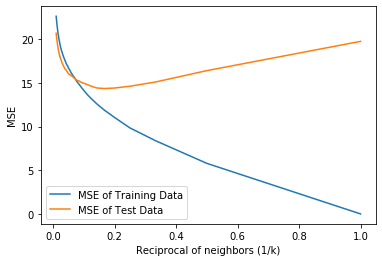

In [97]:
#Perform k-nearest neighbor regression for this dataset using raw features.
#set training data
from sklearn.neighbors import KNeighborsRegressor
KNN_train_x= np.array(train_data.loc[:,["AT","V","AP","RH"]])
KNN_train_y=np.array(train_data["PE"])
KNN_test_x = np.array(test_data.loc[:,["AT","V","AP","RH"]])
KNN_test_y = test_data['PE']

K_array=np.arange(1,101)
knn_test_mse_list = list()
knn_train_mse_list = list()

for k in K_array:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(KNN_train_x,KNN_train_y)
    
    knn_predict_train = knn.predict(KNN_train_x)
    knn_mse_train = mse(knn_predict_train, KNN_train_y)
    knn_train_mse_list.append(knn_mse_train)
    
    knn_predict_test = knn.predict(KNN_test_x)
    knn_predict_mse_test = mse(knn_predict_test, KNN_test_y)
    knn_test_mse_list.append(knn_predict_mse_test)

min_test_error = min(knn_test_mse_list)
best_test_k = K_array[knn_test_mse_list == min_test_error]
print("The best k of test data is %d, the best MSE is" %(best_test_k),min_test_error)
knn_model1_min_test_error = min_test_error
min_train_error = min(knn_train_mse_list)
best_train_k = K_array[knn_train_mse_list == min_train_error]
print("The best k of train data is %d, the best MSE is" %(best_train_k),min_train_error)
knn_model1_min_train_error = min_train_error

#show in plot
plt.plot(1/K_array, knn_train_mse_list, label = "MSE of Training Data")
plt.plot(1/K_array, knn_test_mse_list, label = "MSE of Test Data")
plt.xlabel("Reciprocal of neighbors (1/k)")
plt.ylabel("MSE")
plt.legend()
plt.show()

###  Perform k-nearest neighbor regression for this dataset using normalized features

The best k is 8, the best MSE is 16.338252474638626
The best k of train data is 1, the best MSE is 0.0


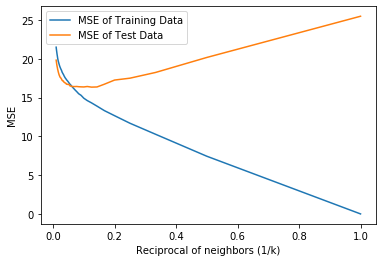

In [93]:
#Perform k-nearest neighbor regression for this dataset using normalize features.
from sklearn.preprocessing import normalize
KNN_train_x= np.array(train_data.loc[:,["AT","V","AP","RH"]])
KNN_train_y=np.array(train_data["PE"])
KNN_test_x = np.array(test_data.loc[:,["AT","V","AP","RH"]])
KNN_test_y = test_data['PE']

#normalization
KNN_train_x=normalize(KNN_train_x)
KNN_test_x=normalize(KNN_test_x)

K_array=np.arange(1,101)
knn_test_mse_list = list()
knn_train_mse_list = list()

for k in K_array:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(KNN_train_x,KNN_train_y)
    
    knn_predict_train = knn.predict(KNN_train_x)
    knn_mse_train = mse(knn_predict_train, KNN_train_y)
    knn_train_mse_list.append(knn_mse_train)
    
    knn_predict_test = knn.predict(KNN_test_x)
    knn_predict_mse_test = mse(knn_predict_test, KNN_test_y)
    knn_test_mse_list.append(knn_predict_mse_test)

min_test_error = min(knn_test_mse_list)
best_k = K_array[knn_test_mse_list == min_test_error]
print("The best k is %d, the best MSE is" %(best_k),min_test_error)
knn_model2_min_test_error = min_test_error
min_train_error = min(knn_train_mse_list)
best_train_k = K_array[knn_train_mse_list == min_train_error]
print("The best k of train data is %d, the best MSE is" %(best_train_k),min_train_error)
knn_model2_min_train_error = min_train_error

#show in plot
plt.plot(1/K_array, knn_train_mse_list, label = "MSE of Training Data")
plt.plot(1/K_array, knn_test_mse_list, label = "MSE of Test Data")
plt.xlabel("Reciprocal of neighbors (1/k)")
plt.ylabel("MSE")
plt.legend()
plt.show()

# (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [95]:
#show best MSE of four model in a table
best_MSE_df=pd.DataFrame([model1_test_mse,model2_test_mse,knn_model1_min_test_error,knn_model2_min_test_error],\
                        index=["Linear Model 1","Linear Model 2","KNN Model 1","KNN Model 2"],\
                        columns=["MSE of Test Data"])
print("The KNN model which use the row feature of dataset has the best MSE : ",knn_model1_min_test_error )
best_MSE_df

The KNN model which use the row feature of dataset has the best MSE :  14.355880591354161


,MSE of Test Data
Linear Model 1,19.763216
Linear Model 2,16.809235
KNN Model 1,14.355881
KNN Model 2,16.338252


Conclusion：
Through Analyze the result of four models, we can directly find that KNN regression model is better than the linear regression model. In linear models, after increasing the number of independent variables and removing high p-value variables, the accuracy of the model becomes better. Comparatively, in the KNN regression model, normalization does not make this model become better. 
However, all the above results are based on my own training data and test data. If I change the training data and test data, the MSE of each model will change and the conclusion might also be changed. 
Therefore, this is not the best result, it is just a better result based on my own training data and test data.

# 2.4.1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
(a) The sample size n is extremely large, and the number of predictors p is small.
    answer: Flexible method is better than infilexible method. In this condition, few predictors makes inflexible method become underfitting.

(b) The number of predictors p is extremely large, and the number of observations n is small.
    answer: Inflexble metod is better in this condition. Larger munber of predictors lead the felxible model become overfitting.
    
(c) The relationship between the predictors and response is highly non-linear.
    answer: Flexible method is better. It is hard for inflexible metod to describe the non-liner relationship.
    
(d) The variance of the error terms, i.e. σ2 = Var(), is extremely high.
    answer: Inflexible model should be better. The model tends to be overfitting because of the noise because the variance of the error terms is too high. Using a unflexible model will avoid this problem.

# 2.4.7 The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.
(b) What is our prediction with K = 1? Why?
(c) What is our prediction with K = 3? Why?
(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large orsmall? Why?

### 2.4.7(a) calculate Euclidean distance

In [55]:
from sklearn.metrics.pairwise import euclidean_distances
ob1 = [0,3,0,'Red']
ob2 = [2,0,0,'Red']
ob3 = [0,1,3,'Red']
ob4 = [0,1,2,'Green']
ob5 = [-1,0,1,'Green']
ob6 = [1,1,1,'Red']

point_dataset = pd.DataFrame([ob1,ob2,ob3,ob4,ob5,ob6], index=[1,2,3,4,5,6],columns=['X1','X2','X3','Y'])
train_x = np.array(point_dataset.iloc[:,:3]) 
train_y = np.array(point_dataset['Y'])
test_data = pd.DataFrame([[0,0,0,'Red']], columns=['X1','X2','X3','Y'], index=[1])
test_x = test_data.iloc[:,:3]
test_y = test_data['Y']

distance=euclidean_distances(train_x,test_x)
for i in range(len(distance)):
    print("Distance to point %d is : "%(i+1),round(distance[i][0],2))


Distance to point 1 is :  3.0
Distance to point 2 is :  2.0
Distance to point 3 is :  3.16
Distance to point 4 is :  2.24
Distance to point 5 is :  1.41
Distance to point 6 is :  1.73


### 2.4.7(b)  What is our prediction with K = 1? 
When K=1, point 5 is the nearest point. According to KNN algorithm, test point has the same "Y" with point 5, therefore, we predict the "Y" of test point is "Green"

### 2.4.7(c)What is our prediction with K = 3? Why?
When K=3, point 5,6,2 is the three nearest points with test point,the "Y" of test should be same with almost nearest point, therefore we can predict the "Y" of test point is "Red"  

### 2.4.7 (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
Best value for K should be small, so that the model can fit to the nonlinear pattern. Decision boundary tends to be linear when K is large.